# Taller 2
### Juan Daniel Torres Amézquita (201414896)

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import scipy.integrate as spint

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Datos Llantas tractivas 
rll=0.139 # Radio geométrico de las llantas en traseras (m)
r=0.98*rll # Radio efectivo llantas traseras (m)
rin=0.0631 #radio interno del neumático (m)

dll=0.975 # Distancia entre ejes de llantas delanteras (m)
alj=0.88 # Altura con el piloto sentado en el kart (estatura 1.68 m) (m)
rho=1.1955 # densidad del aire (kg/m^3)
af=(dll*alj)/2 # Area Frontal Kart (m^2)
cd=0.89 # Coeficiente de Arrastre Kart
vw=0.0 # velocidad del viento (m/s)
theta=0.0 # Angulo carretera
g=9.81 # Gravedad (m/s)

## Datos Transmisión
dp=1 # Dientes del piñon
dpl=3.54 # Dientes del plato
Nc=dpl/dp # Relación de Transmisión
ef=0.95 # Eficiencia de transmisión

# Datos eje llantas
reje=0.02 # Radio eje de las llantas (m)
meje=3.832 # Masa del eje (kg)

# Datos Kart general
masa=152 # masa del Kart (kg)
g=9.81 # Gravedad (m/s)
w=masa*g # peso del Kart (N)
m = masa

# Datos Inercias
i_e=5.2E-3 # Inercia motor de combustión (kg m^2) 

rpi=0.01525#(m)
rpla=0.04096 #(m)
rhoac=7850.0 # Densidad del Acero (kg/m^3)
bpi=0.01 # Ancho piñon (m)
bpla=0.02 # Ancho plato (m)
vpi= bpi*np.pi*rpi**2 # Volumen del piñon (m^3)
vpla=bpla*np.pi*rpla**2 # Volumen del plato (m^3)
mpi=rhoac*vpi # Masa del piñon (kg)
mpla=rhoac*vpla # Masa del plato (kg)
mllt=1.43 # Masa llantas traseras (kg)
mlld=1.20 # Masa llantas delanteras (kg)
rlld=0.129 # Radio llantas delanteras (m)
rind=0.0631 # Radio rin llantas delanteras (m)
mbt=0.7*mllt # El porcentaje de la masa total que pesa la parte "banda" de la llanta trasera
mdt=0.3*mllt # El porcentaje de la masa total que pesa la parte "disco" de la llanta trasera
mbd=0.7*mlld # El porcentaje de la masa total que pesa la parte "banda" de la llanta delantera
mdd=0.3*mlld # El porcentaje de la masa total que pesa la parte "disco" de la llanta delantera
illd=(mbd*rlld)+(mdd*(rlld**2-rind**2))/2 # Inercia 1 llanta delantera (kg-m^2)
illt=(mbt*rll)+(mdt*(rll**2-rin**2))/2 # Inercia 1 llanta trasera (kg-m^2)
ig=((mpi*(rpi**2))/2.0)+((mpla*(rpla**2))/2.0) # Inercia de la transmisión (kg-m^2)
ieje=(meje*reje**2)/2.0 # Inercia del eje de las llantas (kg-m^2)


i_w = 2*illd + 2*illt
i_d = ig + ieje


In [3]:
def f_rodadura(vx,w):
    fr=0.01*(1+((vx/0.277778)/100.0)) # Factor de rodadura la velocidad del kart debe estar en (km/h)
    return w*fr # (N)

In [4]:
def f_arrastre(vx):
    return (1.0/2.0)*rho*af*cd*(vx+vw)**2 # (N)

In [5]:
def t_engine(vx,r,Nc):
    omega_llanta = (vx/r)
    omega_motor = omega_llanta*Nc
    rpm = omega_motor*30/(np.pi)
    P =((-0.00000004564538677*rpm**3)+(0.0001056995459*rpm**2)+(1.53209191*rpm)-1.895523696)
    T = P/omega_motor
    return T

In [6]:
def M_r(Nc,r,Iw,Id,Ie):
    mr=((Iw+Id)+Ie*Nc**2)/r**2
    return mr

In [7]:
def a_x (velv,t0):
    xx,vel = velv
    f_rod = f_rodadura(vel,w)
    f_drag = f_arrastre(vel)
    t_e = t_engine(vel,r,Nc)
    mr = M_r(Nc,r,i_w,i_d,i_e)
    ax = ((t_e*Nc*ef/r)-f_rod-f_drag)/(mr+m)
    resultado = vel,ax
    return resultado

In [8]:
def a_c (velv,t0):
    xx,vel = velv
    f_b = (-20.5*ef*Nc)/r
    f_rod = f_rodadura(vel,w)
    f_drag = f_arrastre(vel)
    mr = M_r(Nc,r,i_w,i_d,i_e)
    ac = (f_b-f_rod-f_drag)/(mr+m)
    resultado = vel,ac
    return resultado

In [9]:
# Condiciones iniciales
c_ini = [0,0.1] # Se establecen las condiciones iniciales de posición (primera casilla) y velocidad (segunda casilla).

En el array de condiciones iniciales establecido arriba, se usa una velocidad inicial de 0.1 para evitar casos de división sobre 0 en el funcionamiento interno del código.

In [10]:
#Proceso de aceleración

t_ax_in = 0.1 # Se establece el tiempo inicial (cercano a 0).
t_ax_fin = 10 # Se establece el tiempo final en una cantidad arbitraria.
t_ax = np.linspace(t_ax_in,t_ax_fin,1000) # Se crea un vector de 100 pasos con los puntos inicial y final establecidos anteriormente.
sol_ax = spint.odeint(a_x, c_ini, t_ax) # Se soluciona la función de aceleración usando odeint, y el vector de tiempo establecido exclusivamente para la aceleración.
vel = sol_ax[:,1] # Se almacenan los datos de velocidad obtenidos de la solución.
diff = vel[-1]-vel[len(vel)-2] # Se obtiene una diferencia entre los dos últimos datos de velocidad.
while diff > 0.004: # Mientras la diferencia sea mayor al parámetro establecido...
    t_ax_fin = t_ax_fin + 1 # ...el valor del tiempo final se hará mayor...
    t_ax = np.linspace(t_ax_in,t_ax_fin,1000) # ...se redefine el vector de tiempo de aceleración...
    sol_ax = spint.odeint(a_x, c_ini, t_ax) # ...se vuelve a resolver la aceleración usando el nuevo vector de tiempo...
    vel = sol_ax[:,1] # ...se obtiene un nuevo vector de velocidades... 
    pos = sol_ax[:,0] # Se crea un vector con las posiciones del vehículo.
    diff = vel[-1]-vel[len(vel)-2] #... y finalmente se hace una diferencia (para ver si es necesario repetir el proceso).

Explicamos el proceso de aceleración: en tanto que la diferencia entre los últimos datos de velocidad sea significativa, esto es indicativo que el vehículo sigue acelerando y por lo tanto, no ha llegado a su velocidad máxima. Cuando la diferencia es muy pequeña, se da por concluida la aceleración del kart.

In [11]:
# Proceso de frenado
vel_max = vel[-1] # Se obtiene la velocidad máxima del kart.
pos_inifr = pos[-1] # Se obtiene la posición a partir de la cual el kart frenará.
c_fr = [pos_inifr,vel_max] # Se establecen las condiciones iniciales del frenado.
t_ac_in = t_ax_fin # Se establece el tiempo inicial de frenado (como el tiempo final de la aceleración).
t_ac_fin = t_ac_in + 0.5 # Se establece el tiempo final de frenado.
t_ac = np.linspace(t_ac_in,t_ac_fin,100) # Se establece el vector de tiempo de frenado del kart.
sol_ac = spint.odeint(a_c, c_fr, t_ac) # Se soluciona la ecuación de aceleración en el frenado.
velfr = sol_ac[:,1] # Se almacena la velocidad del kart durante el frenado.

while velfr[-1] > 0.1: # Mientras la velocidad sea mayor a 0...
    t_ac_fin = t_ac_fin + 0.5 # ...el valor de tiempo final de frenado aumenta...
    t_ac = np.linspace(t_ac_in,t_ac_fin,100) # ...se redefine el vector de tiempo de frenado...
    sol_ac = spint.odeint(a_c, c_fr, t_ac) # ...se soluciona la ecuación de aceleración con el nuevo vector...
    velfr = sol_ac[:,1] # ...se obtiene el nuevo vector de velocidad en el frenado...
    posfr = sol_ac[:,0] # ...y se obtiene la posición del kart durante el frenado.

acel = np.gradient(vel)*100 # Se obtiene la aceleración del kart.
acelfr = np.gradient(velfr)*100 # Se obtiene la aceleración del kart en el frenado.

In [12]:
#Creación de vectores
t = np.concatenate((t_ax,t_ac)) # Se concatenan los vectores de tiempo.
v = np.concatenate((vel,velfr)) # Se concatenan los vectores de velocidad.
p = np.concatenate((pos,posfr)) # Se concatenan los vectores de posición.
a = np.concatenate((acel,acelfr)) # Se concatenan los vectores de aceleración.

Finalmente, graficamos posición, velocidad y aceleración contra tiempo para distintas relaciones y pesos de kart. Es importante notar que cada vez que se grafica se debe correr todo el código con los parámetros cambiados.

El análisis se organiza de la siguiente manera: Se escogieron tres relaciones de transmisión y tres masas. Las relaciones son 3.54:1 (la relación estándar dada por el código inicial), 1.27:1 (relación asociada a cambios intermedios), y 0.69:1 (asociada a cambios altos, relaciones de velocidad). Adicionalmente, se tuvieron en cuenta tres pesos de kart, 100kg, 152kg, y 220kg.

## Relación de 39/11 (3.54:1) y masa de 152kg

Relación estándar del vehículo. En la mayoría de carros, esta relación se considera como una relación de fuerza (asociada a los primeros cambios de la transmisión).

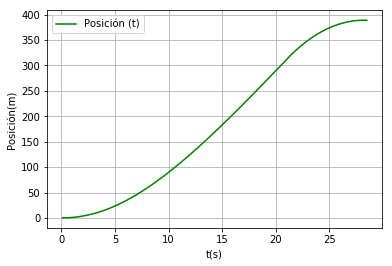

In [13]:
plt.plot(t, p, 'g', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

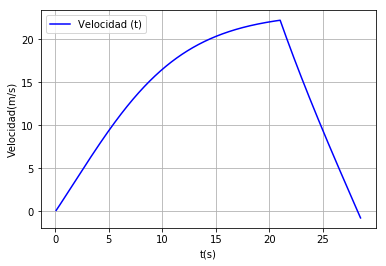

In [14]:
plt.plot(t, v, 'b', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

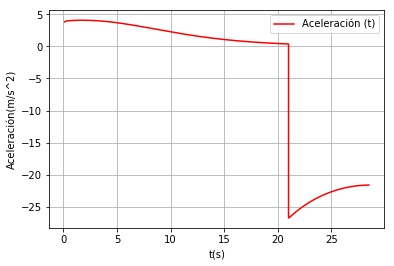

In [15]:
plt.plot(t, a, 'r', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

El tiempo desde cero hasta velocidad máxima y parada es de aproximadamente 30 segundos. El kart desarrolló una velocidad de aproximadamente 23m/s, y el recorrido lo hizo en poco menos de 400 metros.

## Relación de 1.27:1 y masa de 152kg

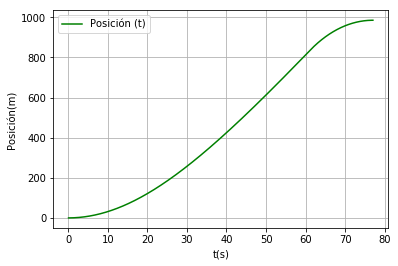

In [27]:
plt.plot(t, p, 'g', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

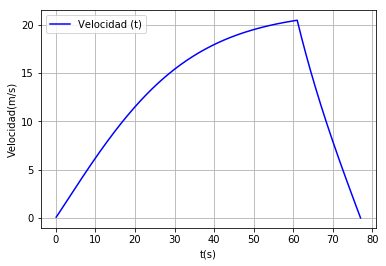

In [28]:
plt.plot(t, v, 'b', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

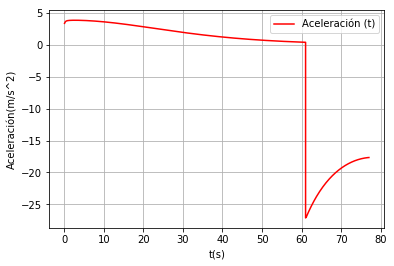

In [29]:
plt.plot(t, a, 'r', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

Vemos que con el mismo peso pero otra relación el desempeño es peor que con la relación de fuerza (3.54:1). Los tiempos son casi el doble que con la relación inicial, la aceleración y la velocidad alcanzadas son peores y se tarda más distancia en hacer el recorrido.

## Relación de 0.69:1 y masa de 152kg

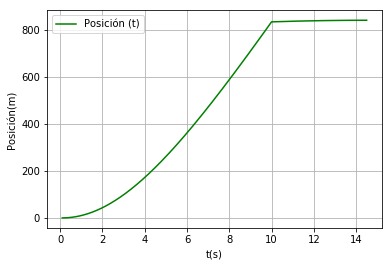

In [41]:
plt.plot(t, p, 'g', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

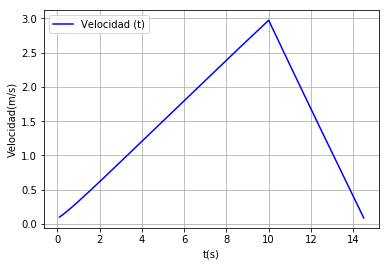

In [42]:
plt.plot(t, v, 'b', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

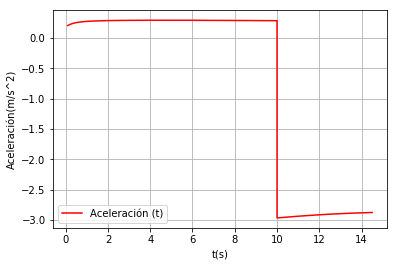

In [43]:
plt.plot(t, a, 'r', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

Podemos observar que aunque los tiempos son menores que en ambos casos, y la distancia no es tan larga como en la relación de 1.27:1, las velocidades y la aceleración alcanzada son muy pequeñas a comparación de las otras relaciones. La aceleración baja implica que el torque ejercido por el motor no se está aprovechando para empujar al vehículo, y como consecuencia de ésto se tiene una velocidad máxima muy baja.

## Relación de 39/11 (3.54:1) y masa de 100kg

En las siguientes gráficas se muestran los valores de posición, velocidad y aceleración con un kart de 100kg.

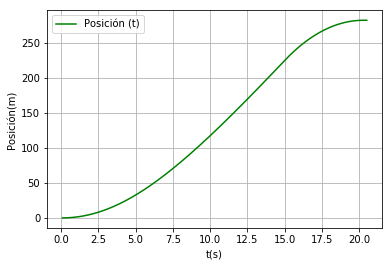

In [67]:
plt.plot(t, p, 'g', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

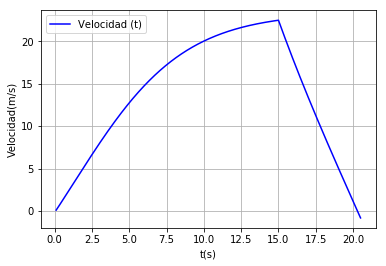

In [68]:
plt.plot(t, v, 'b', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

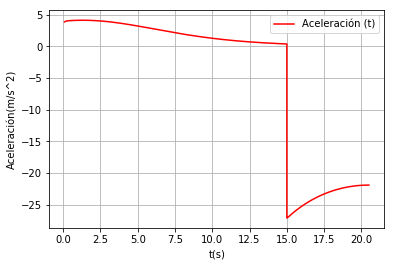

In [69]:
plt.plot(t, a, 'r', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

Aunque las velocidades alcanzadas no varían mucho con respecto a esta relación en 152kg, podemos ver que los tiempos sí se hacen más cortos (hace el recorrido aproximadamente 10 segundos más rápido). Esto quiere decir que la velocidad máxima se alcanza antes, y por lo tanto la distancia recorrida también es menor. Cabe resaltar que la curva de aceleración es prácticamente igual, pero temporalmente es más corta. Adicionalmente, el frenado es mucho más rápido.

## Relación de 1.27:1 y masa de 100kg

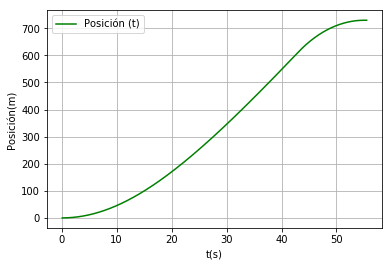

In [92]:
plt.plot(t, p, 'g', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

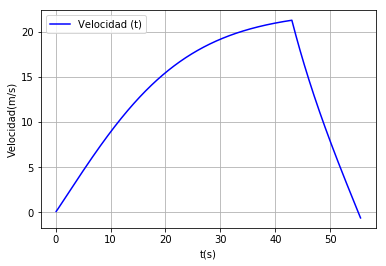

In [93]:
plt.plot(t, v, 'b', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

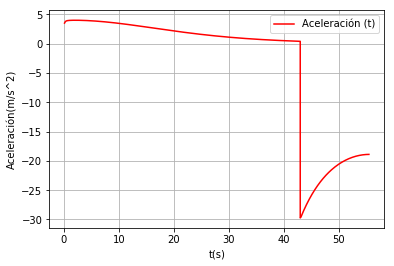

In [94]:
plt.plot(t, a, 'r', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

Vemos que las velocidades alcanzadas son bastante consistentes con los valores anteriormente vistos, pero los tiempos en los que se alcanza la velocidad máxima son mucho más largos para esta relación de transmisión. El tiempo de frenado no se ve afectado por esto, ya que el vehículo para en aproximadamente el mismo tiempo que para la relación 3.54:1.

## Relación de 0.69:1 y masa de 100kg

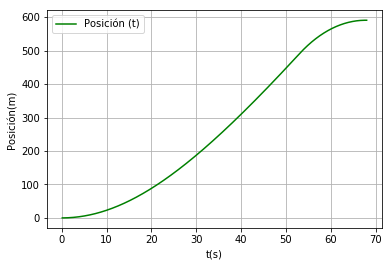

In [99]:
plt.plot(t, p, 'g', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

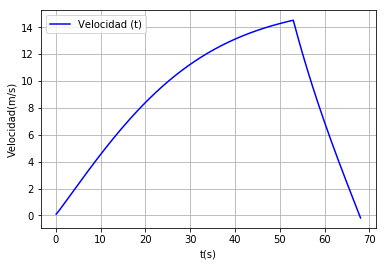

In [100]:
plt.plot(t, v, 'b', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

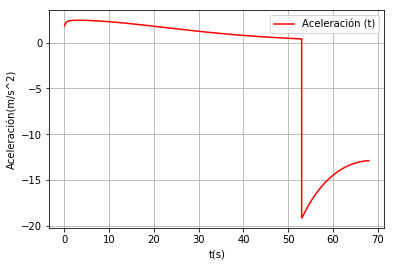

In [101]:
plt.plot(t, a, 'r', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

Podemos observar que aunque el menor peso le permite al vehículo alcanzar velocidades mayores, el desempeño sigue siendo malo comparado con las otras relaciones de transmisión. Podemos empezar a ver la tendencia que, entre mejor se pueda transmitir la potencia y el torque del motor, mejor es el desempeño del vehículo.

Finalmente, tenemos un peso elevado para poder predecir el comportamiento del vehículo cuando va un piloto (de 70 kilos en este caso) montado en este.

## Relación de 39/11 (3.54:1) y masa de 220kg

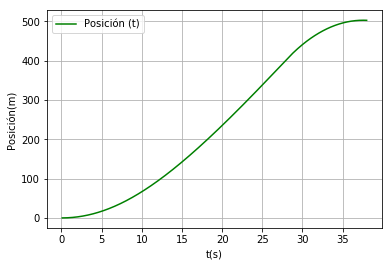

In [120]:
plt.plot(t, p, 'g', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

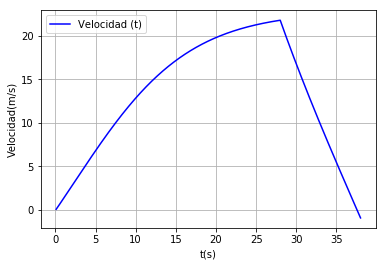

In [121]:
plt.plot(t, v, 'b', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

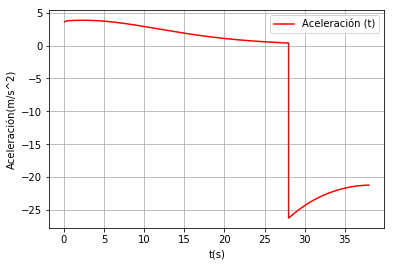

In [122]:
plt.plot(t, a, 'r', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

Las velocidades alcanzadas y la curva de aceleración son consistentes con lo visto anteriormente, pero los tiempos y la distancia cambian. Debido a que el vehículo tiene una mayor masa, se requiere de más tiempo para lograr los efectos deseados (acelerar a la velocidad máxima, y frenar hasta detenerse).

## Relación de 1.27:1 y masa de 220kg

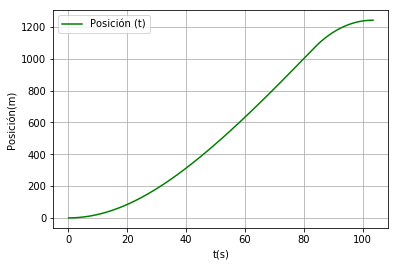

In [13]:
plt.plot(t, p, 'g', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

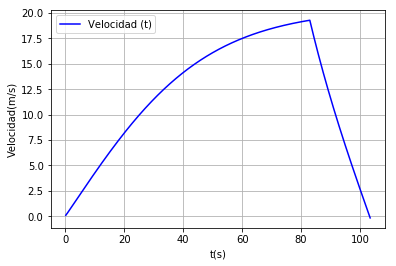

In [14]:
plt.plot(t, v, 'b', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

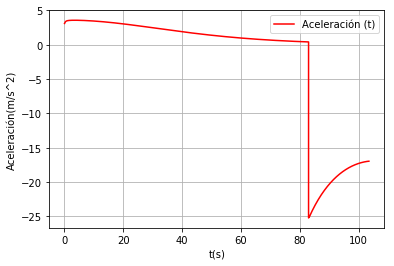

In [15]:
plt.plot(t, a, 'r', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

En estas gráficas se evidencia la desventaja de un gran peso en el kart. Debido a que parte de la potencia del motor se debe usar en transportar el peso, se compromete la velocidad máxima alcanzada. Mientras que para esta misma relación con menores pesos se alcanzaba la misma velocidad máxima que con la relación de fuerza, en este caso obtenemos que ya no se alcanza la misma velocidad.

## Relación de 0.69:1 y masa de 220kg

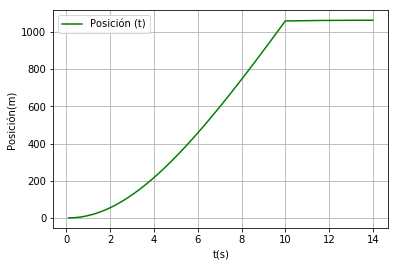

In [33]:
plt.plot(t, p, 'g', label='Posición (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Posición(m)')
plt.grid()
plt.show()

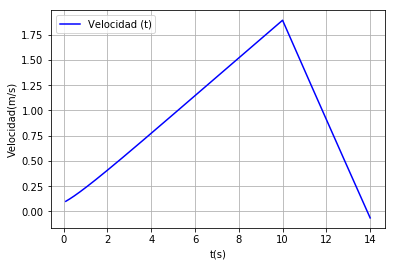

In [34]:
plt.plot(t, v, 'b', label='Velocidad (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Velocidad(m/s)')
plt.grid()
plt.show()

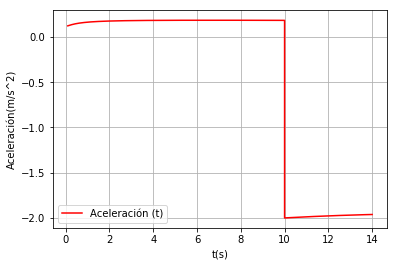

In [35]:
plt.plot(t, a, 'r', label='Aceleración (t)')
plt.legend(loc='best')
plt.xlabel('t(s)')
plt.ylabel('Aceleración(m/s^2)')
plt.grid()
plt.show()

Finalmente, tenemos el peor desempeño. Debido a que esta relación da prioridad a mantener velocidad de giro y no a la transmisión de potencia, las velocidades alcanzadas son muy pequeñas, y las aceleraciones también. Aunque vemos que se necesita muy poco tiempo para realizar el recorrido, esto se debe a que las velocidades no son significantes.

A partir del análisis de las gráficas podemos enunciar una serie de hallazgos y conclusiones sobre el desempeño de karts eléctricos:

- Al momento de elegir una relación en vehículos eléctricos, es importante darle prioridad no a la velocidad de giro sino a la transmisión de potencia. Esto es, el número de dientes del piñón debe ser bajo, mientras que el del plato grande.
- Por ejemplo, los vehículos eléctricos Tesla usan relaciones de 9.73:1 o 9.31:1, dependiendo del tamaño del vehículo.
- El peso del vehículo tiene los siguientes efectos sobre el vehículo: cuando las relaciones de transmisión no son lo suficientemente grandes, se malgasta potencia del vehículo en mover el peso extra. Cuando se tiene una relación de transmisión adecuada, el peso afecta los tiempos en los cuales se alcanza la velocidad máxima y de frenado del vehículo.
- Por lo tanto, es necesario reducir el peso del vehículo en lo posible, y/o tener pilotos ligeros.
- Con un modelo más completo que incorpore fuerzas de frenado en las llantas, se pueden obtener mejores tiempos de frenado.